# <center>Introduction to Pandas</center>

![](https://pandas.pydata.org/_static/pandas_logo.png)


## Installation

Simply,
```
pip install pandas
```


## Reading data from a CSV file

You can read data from a CSV file using the ``read_csv`` function. By default, it assumes that the fields are comma-separated.

In [1]:
# import pandas
import pandas as pd

>The `imdb.csv` dataset contains Highest Rated IMDb "Top 1000" Titles.

In [17]:
# load imdb dataset as pandas dataframe
dataframe=pd.read_csv("imdb_1000.csv")

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [18]:
# show first 5 rows of imdb_df
dataframe.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


>The `bikes.csv` dataset contains information about the number of bicycles that used certain bicycle lanes in Montreal in the year 2012.

In [97]:
# load bikes dataset as pandas dataframe
bike_df=pd.read_csv("bikes.csv" ,sep=";" ,parse_dates=['Date'])

In [98]:
# show first 3 rows of bikes_df
bike_df.head(3)

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-02-01,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-03-01,00:00,58,135,248,104,2.0,89,3,2,15.0


## Selecting columns

When you read a CSV, you get a kind of object called a DataFrame, which is made up of rows and columns. You get columns out of a DataFrame the same way you get elements out of a dictionary.

In [33]:
# list columns of imdb_df
dataframe.columns

Index(['star_rating', 'title', 'content_rating', 'genre', 'duration',
       'actors_list'],
      dtype='object')

In [35]:
# what are the datatypes of values in columns\
dataframe.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [36]:
# list first 5 movie titles
dataframe['title'].head()

0    The Shawshank Redemption
1               The Godfather
2      The Godfather: Part II
3             The Dark Knight
4                Pulp Fiction
Name: title, dtype: object

In [37]:
# show only movie title and genre
dataframe[['title','genre']].head()

,title,genre
0,The Shawshank Redemption,Crime
1,The Godfather,Crime
2,The Godfather: Part II,Crime
3,The Dark Knight,Action
4,Pulp Fiction,Crime


## Understanding columns

On the inside, the type of a column is ``pd.Series`` and pandas Series are internally numpy arrays. If you add ``.values`` to the end of any Series, you'll get its internal **numpy array**.

In [38]:
# show the type of duration column
dataframe['duration'].dtype
print(type(dataframe['duration']))

<class 'pandas.core.series.Series'>


In [46]:
# show duration values of movies as numpy arrays

dataframe['duration'].values[:]

array([142, 175, 200, 152, 154,  96, 161, 201, 195, 139, 178, 148, 124,
       142, 179, 169, 133, 207, 146, 121, 136, 130, 130, 106, 127, 116,
       175, 118, 110,  87, 125, 112, 102, 107, 119,  87, 169, 115, 112,
       109, 189, 110, 150, 165, 155, 137, 113, 165,  95, 151, 155, 153,
       125, 130, 116,  89, 137, 117,  88, 165, 170,  89, 146,  99,  98,
       116, 156, 122, 149, 134, 122, 136, 157, 123, 119, 137, 128, 120,
       229, 107, 134, 103, 177, 129, 102, 216, 136,  93,  68, 189,  99,
       108, 113, 181, 103, 138, 110, 129,  88, 160, 126,  91, 116, 125,
       143,  93, 102, 132, 153, 183, 160, 120, 138, 140, 153, 170, 129,
        81, 127, 131, 172, 115, 108, 107, 129, 156,  96,  91,  95, 162,
       130,  86, 186, 151,  96, 170, 118, 161, 131, 126, 131, 129, 224,
       180, 105, 117, 140, 119, 124, 130, 139, 107, 132, 117, 126, 122,
       178, 238, 149, 172,  98, 116, 116, 123, 148, 123, 182,  92,  93,
       100, 135, 105,  94, 140,  83,  95,  98, 143,  99,  98, 12

## Applying functions to columns

Use `.apply` function to apply any function to each element of a column.

In [47]:
# convert all the movie titles to uppercase
x = lambda a : a.upper()
dataframe['title'].apply(x).head()

0    THE SHAWSHANK REDEMPTION
1               THE GODFATHER
2      THE GODFATHER: PART II
3             THE DARK KNIGHT
4                PULP FICTION
Name: title, dtype: object

## Plotting a column

Use ``.plot()`` function!

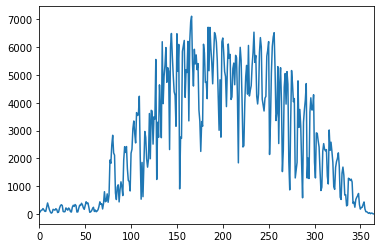

In [57]:
# plot the bikers travelling to Berri1 over the year
import matplotlib.pyplot as plt
bike_df['Berri1'].plot()
plt.show()

In [71]:
# plot all the columns of bikes_df

#originally during the reading of this csv file we hadnt set the index in this file which means during 
#plotting all the columns we have to explicitly set any of the column as index
bike_df.index = pd.to_datetime(bike_df.index)
bike_df.plot(figsize=(10,8))
plt.show()

## Value counts

Get count of unique values in a particular column/Series.

In [74]:
# what are the unique genre in imdb_df?
dataframe['genre'].value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [76]:
# plotting value counts of unique genres as a bar chart
dataframe['genre'].value_counts().plot.bar()

In [77]:
# plotting value counts of unique genres as a pie chart
dataframe['genre'].value_counts().plot.pie()

## Index

### DATAFRAME = COLUMNS + INDEX + ND DATA

### SERIES = INDEX + 1-D DATA

**Index** or (**row labels**) is one of the fundamental data structure of pandas. It can be thought of as an **immutable array** and an **ordered set**.

> Every row is uniquely identified by its index value.

In [127]:
# show index of bikes_df
#dataframe2=pd.read_csv("bikes.csv",sep=";",parse_dates=['Date'])
#list(dataframe2.head(100).index)
bike_df.index

RangeIndex(start=0, stop=366, step=1)

In [123]:
# get row for date 2012-01-01
#bike_df.loc[str(dataframe['Date'])=='2012-01-01']

#### To get row by integer index:

Use ``.iloc[]`` for purely integer-location based indexing for selection by position.

In [106]:
# show 11th row of imdb_df using iloc
dataframe.iloc[11]

star_rating                                                     8.8
title                                                     Inception
content_rating                                                PG-13
genre                                                        Action
duration                                                        148
actors_list       [u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'...
Name: 11, dtype: object

## Selecting rows where column has a particular value

In [109]:
# select only those movies where genre is adventure
dataframe.loc[dataframe['genre']=='Adventure']

,star_rating,title,content_rating,genre,duration,actors_list
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
14,8.8,The Lord of the Rings: The Two Towers,PG-13,Adventure,179,"[u'Elijah Wood', u'Ian McKellen', u'Viggo Mort..."
15,8.7,Interstellar,PG-13,Adventure,169,"[u'Matthew McConaughey', u'Anne Hathaway', u'J..."
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
68,8.4,Das Boot,R,Adventure,149,"[u'J\xfcrgen Prochnow', u'Herbert Gr\xf6nemeye..."
71,8.4,North by Northwest,APPROVED,Adventure,136,"[u'Cary Grant', u'Eva Marie Saint', u'James Ma..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
101,8.3,Monty Python and the Holy Grail,PG,Adventure,91,"[u'Graham Chapman', u'John Cleese', u'Eric Idle']"
114,8.3,Inglourious Basterds,R,Adventure,153,"[u'Brad Pitt', u'Diane Kruger', u'Eli Roth']"


In [181]:
# which genre has highest number of movies with star rating above 8 and duration more than 130 minutes?
#df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
import numpy as np
dataframe.loc[(dataframe['star_rating']>8) & (dataframe['duration']>130)]
#print(np.max(dataframe['genre'].value_counts()))

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."


## Adding a new column to DataFrame

In [150]:
# add a weekday column to bikes_df
bike_df.insert(2,"weekday",True)
bike_df.head(3)

,Date,Unnamed: 1,weekday,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,True,16,35,51,38,5.0,26,10,0,27.0
1,2012-02-01,00:00,True,43,83,153,68,11.0,53,6,1,21.0
2,2012-03-01,00:00,True,58,135,248,104,2.0,89,3,2,15.0


## Deleting an existing column from DataFrame

In [151]:
# remove column 'Unnamed: 1' from bikes_df
bike_df.drop(['weekday'],axis=1,inplace=True)
bike_df.head(3)

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
0,2012-01-01,00:00,16,35,51,38,5.0,26,10,0,27.0
1,2012-02-01,00:00,43,83,153,68,11.0,53,6,1,21.0
2,2012-03-01,00:00,58,135,248,104,2.0,89,3,2,15.0


## Deleting a row in DataFrame

In [164]:
# remove row no. 1 from bikes_df
bike_df.drop(bike_df.head(1).index,inplace=True)
bike_df.head(3)

,Date,Unnamed: 1,Rachel / Papineau,Berri1,Maisonneuve_2,Maisonneuve_1,Brébeuf,Parc,PierDup,CSC (Côte Sainte-Catherine),Pont_Jacques_Cartier
2,2012-03-01,00:00,58,135,248,104,2.0,89,3,2,15.0
3,2012-04-01,00:00,61,144,318,116,2.0,111,8,1,19.0
4,2012-05-01,00:00,95,197,330,124,6.0,97,13,2,16.0


## Group By

Any groupby operation involves one of the following operations on the original object. They are −

- Splitting the Object

- Applying a function

- Combining the results

In many situations, we split the data into sets and we apply some functionality on each subset. In the apply functionality, we can perform the following operations −

- **Aggregation** − computing a summary statistic

- **Transformation** − perform some group-specific operation

- **Filtration** − discarding the data with some condition

In [166]:
# group imdb_df by movie genres
dataframe.groupby('genre').groups

{'Action': Int64Index([  3,  11,  12,  19,  20,  36,  37,  43,  44,  45,
             ...
             884, 885, 896, 906, 908, 918, 954, 963, 967, 976],
            dtype='int64', length=136),
 'Adventure': Int64Index([  7,  10,  14,  15,  54,  68,  71,  85, 101, 114, 120, 128, 133,
             137, 140, 142, 164, 179, 204, 206, 214, 222, 224, 245, 271, 299,
             309, 310, 328, 333, 336, 339, 359, 362, 368, 376, 393, 419, 424,
             429, 445, 454, 479, 510, 520, 522, 537, 551, 555, 564, 576, 605,
             629, 642, 658, 662, 698, 727, 754, 758, 794, 814, 852, 891, 898,
             900, 909, 911, 932, 935, 936, 937, 943, 953, 975],
            dtype='int64'),
 'Animation': Int64Index([ 30,  55,  61,  64,  69,  81, 117, 126, 131, 147, 160, 167, 192,
             193, 241, 256, 277, 294, 303, 305, 308, 332, 343, 357, 378, 381,
             386, 395, 414, 417, 443, 453, 461, 471, 487, 489, 494, 498, 501,
             512, 518, 541, 607, 617, 625, 656, 657, 664, 669, 6

In [167]:
# get crime movies group
dataframe.groupby('genre').get_group('Crime')

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
21,8.7,City of God,R,Crime,130,"[u'Alexandre Rodrigues', u'Matheus Nachtergael..."
23,8.7,The Usual Suspects,R,Crime,106,"[u'Kevin Spacey', u'Gabriel Byrne', u'Chazz Pa..."
28,8.6,Leon: The Professional,R,Crime,110,"[u'Jean Reno', u'Gary Oldman', u'Natalie Portm..."
34,8.6,American History X,R,Crime,119,"[u'Edward Norton', u'Edward Furlong', u""Beverl..."
40,8.5,The Green Mile,R,Crime,189,"[u'Tom Hanks', u'Michael Clarke Duncan', u'Dav..."
49,8.5,The Departed,R,Crime,151,"[u'Leonardo DiCaprio', u'Matt Damon', u'Jack N..."


In [175]:
# get mean of movie durations for each group
#dataframe.loc[:,"duration"].mean()
dataframe.groupby(['genre']).mean()

,star_rating,duration
genre,,
Action,7.884559,126.485294
Adventure,7.933333,134.840000
Animation,7.914516,96.596774
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Crime,7.916935,122.298387
Drama,7.902518,126.539568
Family,7.850000,107.500000
Fantasy,7.700000,112.000000


In [178]:
# change duration of all movies in a particular genre to mean duration of the group


In [194]:
# drop groups/genres that do not have movie duration greater than 120.
dataframe[dataframe['duration']>120]['genre']

0          Crime
1          Crime
2          Crime
3         Action
4          Crime
6        Western
7      Adventure
8      Biography
9          Drama
10     Adventure
11        Action
12        Action
13         Drama
14     Adventure
15     Adventure
16         Drama
17         Drama
18     Biography
19        Action
20        Action
21         Crime
22         Drama
24         Drama
26       Western
30     Animation
36        Action
40         Crime
42     Biography
43        Action
44        Action
         ...    
879        Drama
884       Action
888    Biography
889        Drama
891    Adventure
893        Crime
895        Drama
898    Adventure
900    Adventure
901        Drama
905       Horror
909    Adventure
910        Drama
914        Drama
918       Action
922        Drama
923        Drama
924        Crime
932    Adventure
935    Adventure
936    Adventure
941        Drama
944       Comedy
955        Drama
964    Biography
967       Action
968        Drama
973        Dra

In [ ]:
# group weekday wise bikers count

In [ ]:
# get weekday wise biker count

In [179]:
# plot weekday wise biker count for 'Berri1'